# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Set units as metric
    units = "metric"
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | walvis bay
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hihifo
City not found. Skipping...
Processing Record 6 of Set 1 | labytnangi
Processing Record 7 of Set 1 | smithers
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | srirampur
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | manokwari
Processing Record 18 of Set 1 | mantua
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | west island
Processi

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,23.51,78,100,5.92,ZA,1703920624
1,waitangi,-43.9535,-176.5597,17.68,96,100,3.13,NZ,1703920624
2,walvis bay,-22.9575,14.5053,17.83,75,0,1.45,NA,1703920625
3,ushuaia,-54.8000,-68.3000,7.81,87,75,11.83,AR,1703920625
4,labytnangi,66.6572,66.4183,-15.64,78,50,10.53,RU,1703920626


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,23.51,78,100,5.92,ZA,1703920624
1,waitangi,-43.9535,-176.5597,17.68,96,100,3.13,NZ,1703920624
2,walvis bay,-22.9575,14.5053,17.83,75,0,1.45,NaN,1703920625
3,ushuaia,-54.8000,-68.3000,7.81,87,75,11.83,AR,1703920625
4,labytnangi,66.6572,66.4183,-15.64,78,50,10.53,RU,1703920626


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

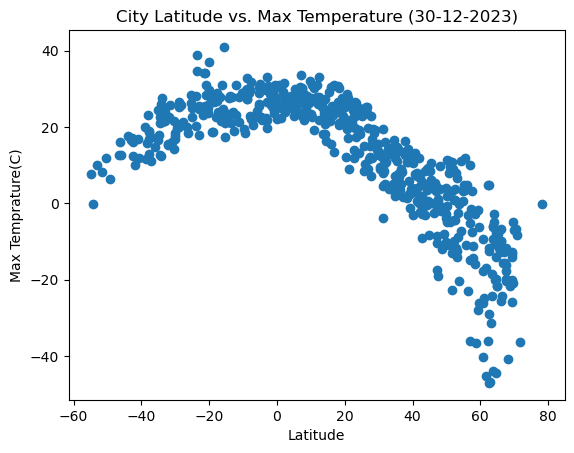

In [31]:
# Build scatter plot for latitude vs. temperature
xaxis_data = city_data_df["Lat"].astype(float)
yaxis_data = city_data_df["Max Temp"].astype(float)
plt.scatter(xaxis_data,yaxis_data)

# Format date
date = datetime.now()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

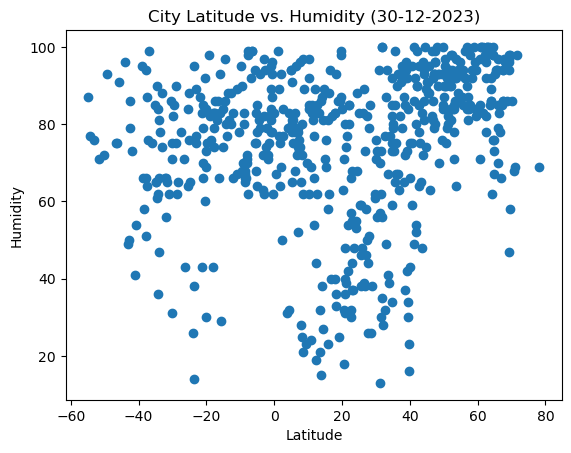

In [32]:
# Build the scatter plots for latitude vs. humidity
xaxis_data = city_data_df["Lat"].astype(float)
yaxis_data = city_data_df["Humidity"].astype(float)
plt.scatter(xaxis_data,yaxis_data)

# Format date
date = datetime.now()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

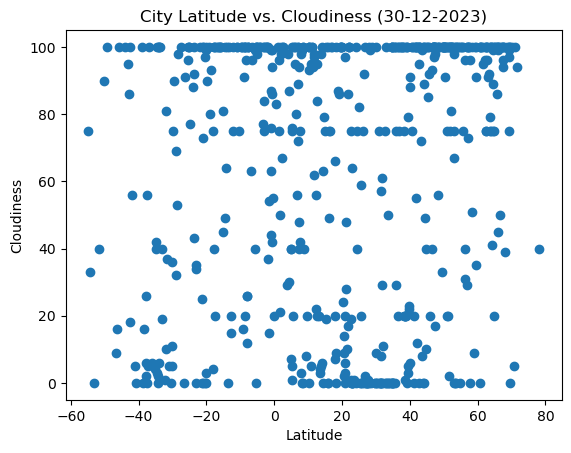

In [33]:
# Build the scatter plots for latitude vs. cloudiness
xaxis_data = city_data_df["Lat"].astype(float)
yaxis_data = city_data_df["Cloudiness"].astype(float)
plt.scatter(xaxis_data,yaxis_data)

# Format date
date = datetime.now()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

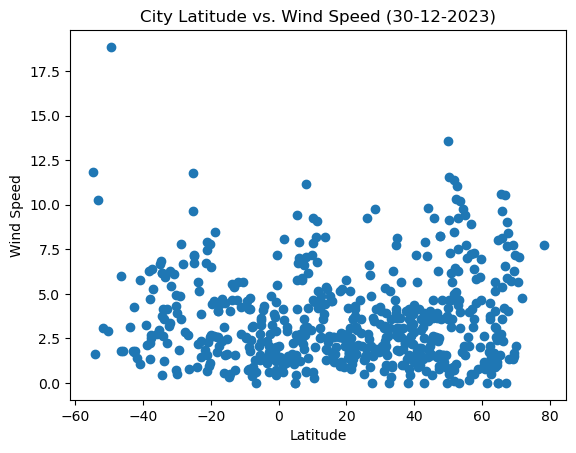

In [34]:
# Build the scatter plots for latitude vs. wind speed
xaxis_data = city_data_df["Lat"].astype(float)
yaxis_data = city_data_df["Wind Speed"].astype(float)
plt.scatter(xaxis_data,yaxis_data)

# Format date
date = datetime.now()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (m,c,r,p,stderr) = lineregress(xaxis_data,yaxis_data)
# calc_y = m*x+c
# eq = "y= " + str(round(m,2)) + "x+ ",str(round(c,2))



In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,labytnangi,66.6572,66.4183,-15.64,78,50,10.53,RU,1703920626
5,smithers,54.7804,-127.1743,3.18,93,100,2.06,CA,1703920340
7,qaqortoq,60.7167,-46.0333,-17.82,71,0,2.62,GL,1703920628
11,enewetak,11.3474,162.3373,27.69,81,94,6.80,MH,1703920629
12,srirampur,22.9489,88.0189,26.49,37,0,3.02,IN,1703920630


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,23.51,78,100,5.92,ZA,1703920624
1,waitangi,-43.9535,-176.5597,17.68,96,100,3.13,NZ,1703920624
2,walvis bay,-22.9575,14.5053,17.83,75,0,1.45,NaN,1703920625
3,ushuaia,-54.8000,-68.3000,7.81,87,75,11.83,AR,1703920625
6,papatowai,-46.5619,169.4708,12.62,75,9,6.00,NZ,1703920627


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7713063273695167


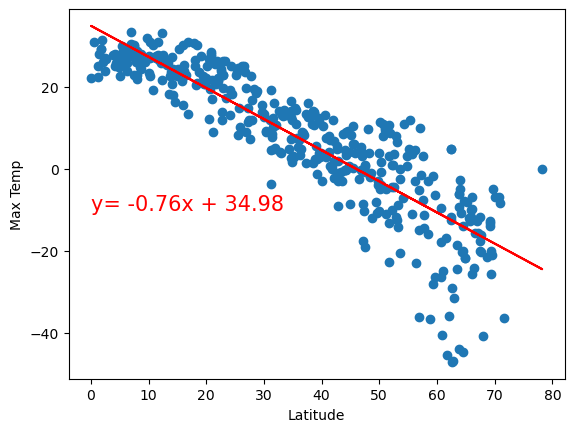

In [47]:
# Linear regression on Northern Hemisphere
xaxis_data = northern_hemi_df["Lat"].astype("float")
yaxis_data = northern_hemi_df["Max Temp"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (0,-10), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

The r-value is: 0.4429428555624949


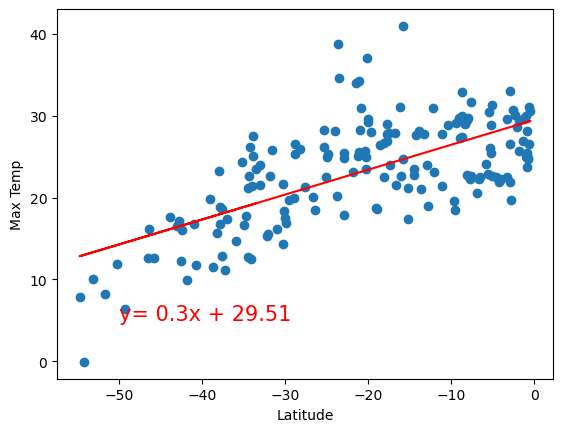

In [64]:
# Linear regression on Southern Hemisphere
xaxis_data = southern_hemi_df["Lat"].astype("float")
yaxis_data = southern_hemi_df["Max Temp"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (-50,5), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

**Discussion about the linear relationship:Northern Hemisphere: r value is 0.8. This shows a positive linear correlation tending towards strong positive linear coorelation. This means in the northern hemisphere predictor of maximum temperatures can be made with moderate to strong accuracy depending on the distance from the equator.
Southern Hemisphere: r value is 0.4. This shows a moderate positive correlation between latitude and temperature

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15928606364085166


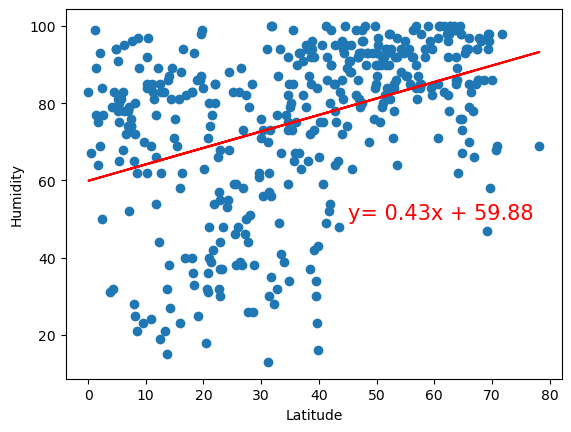

In [53]:
# Northern Hemisphere
xaxis_data = northern_hemi_df["Lat"].astype("float")
yaxis_data = northern_hemi_df["Humidity"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (45,50), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

The r-value is: 0.03784415967849862


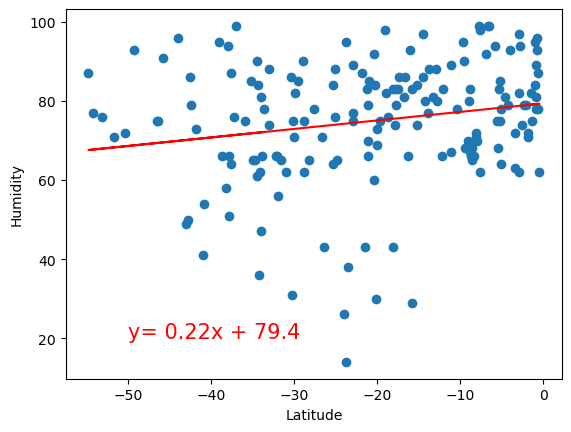

In [56]:
# Southern Hemisphere
xaxis_data = southern_hemi_df["Lat"].astype("float")
yaxis_data = southern_hemi_df["Humidity"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (-50,20), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

**Discussion about the linear relationship:Northern Hemisphere: r value is 0.16. This suggests a very weak or no correlation between latitude and humidity of a place
Northern Hemisphere: r value is 0.04. This too suggests a very weak or no correlation between latitude and humidity of a place

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06323442667306402


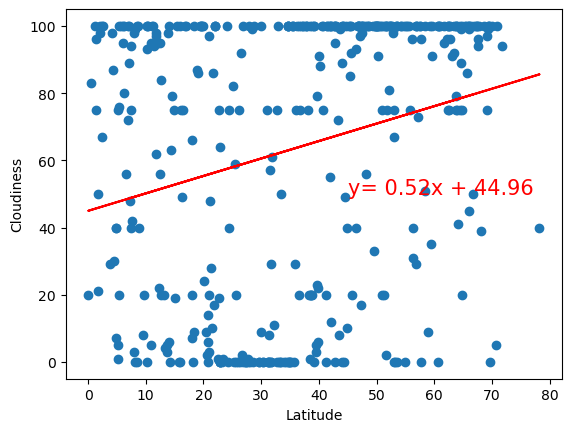

In [57]:
# Northern Hemisphere
xaxis_data = northern_hemi_df["Lat"].astype("float")
yaxis_data = northern_hemi_df["Cloudiness"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (45,50), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

The r-value is: 0.11304390602093135


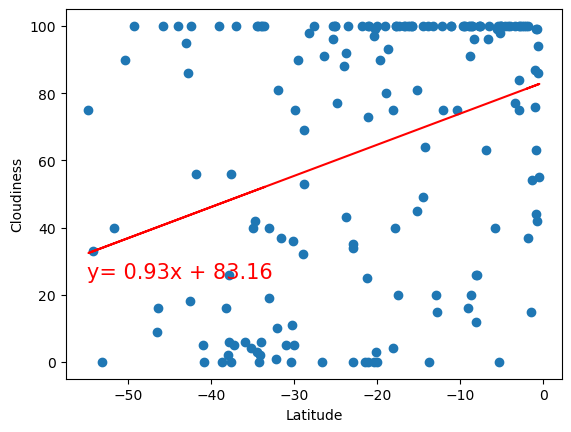

In [63]:
# Southern Hemisphere
xaxis_data = southern_hemi_df["Lat"].astype("float")
yaxis_data = southern_hemi_df["Cloudiness"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (-55,25), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

**Discussion about the linear relationship:Given the r value of for both hemispheres being less than 0.2, there is a very weak or no correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01327652958888782


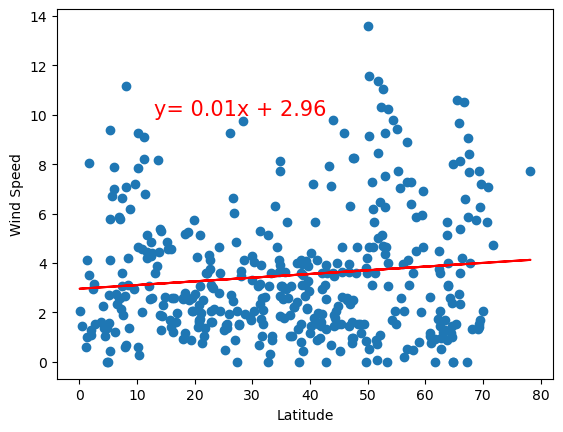

In [66]:
# Northern Hemisphere
xaxis_data = northern_hemi_df["Lat"].astype("float")
yaxis_data = northern_hemi_df["Wind Speed"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (13,10), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

The r-value is: 0.09012469408314527


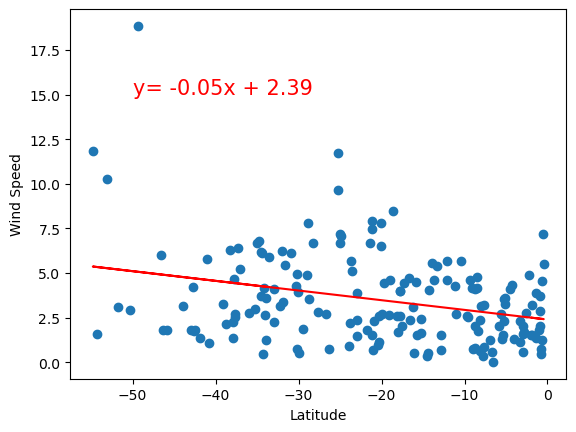

In [68]:
# Southern Hemisphere
xaxis_data = southern_hemi_df["Lat"].astype("float")
yaxis_data = southern_hemi_df["Wind Speed"].astype("float")
plt.scatter(xaxis_data,yaxis_data)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(m,c,r,p,stderr) = linregress(xaxis_data,yaxis_data)
calc_y = m * xaxis_data + c
eq = "y= " + str(round(m,2)) + "x + " + str(round(c,2))
plt.plot(xaxis_data,calc_y,"r-")
plt.annotate(eq, (-50,15), fontsize=15, color="red")
print(f"The r-value is: {r**2}")
plt.show()

**Discussion about the linear relationship:Given the r value of for both hemispheres being less than 0.2, there is a very weak or no correlation between wind speed and latitude